In [1]:
import json
from pprint import pprint
import pandas as pd

br_json1 = json.load(open('linearized_br.json', encoding="utf8"))

In [2]:
brs=pd.DataFrame(br_json1['@graph'])

In [3]:
set(brs.columns)

{'a',
 'citation',
 'contributor',
 'date',
 'identifier',
 'iri',
 'label',
 'reference',
 'title'}

In [4]:
brs.head(1)

,a,citation,contributor,date,identifier,iri,label,reference,title
0,"[document, article]",NaN,"[{'label': 'agent role 01101 [ar/01101]', 'rol...","{'a': 'year', 'value': '1994'}",[{'id': 'http://www.ssoar.info/ssoar/handle/do...,gbr:01101,bibliographic resource 01101 [br/01101],NaN,"Italien: das Phantom der ""2. Republik"""


In [5]:
a_s=[]
for item in list(brs["a"]):
    for item1 in item:
        a_s.append(item1)

In [207]:
set(a_s)

{'article', 'book', 'collection', 'document', 'inbook', 'review'}

In [187]:
dftype=pd.DataFrame(a_s)

In [188]:
dftype.head(1)

,0
0,document


In [193]:
dftype=pd.DataFrame(dftype.groupby(0).count())

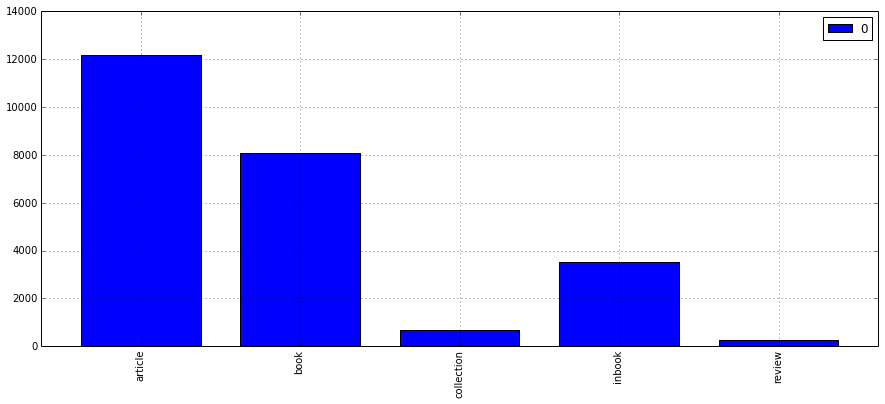

In [205]:
dftype.ix[["article","book","collection","inbook","review"]].plot(kind="bar",figsize=(15,6));

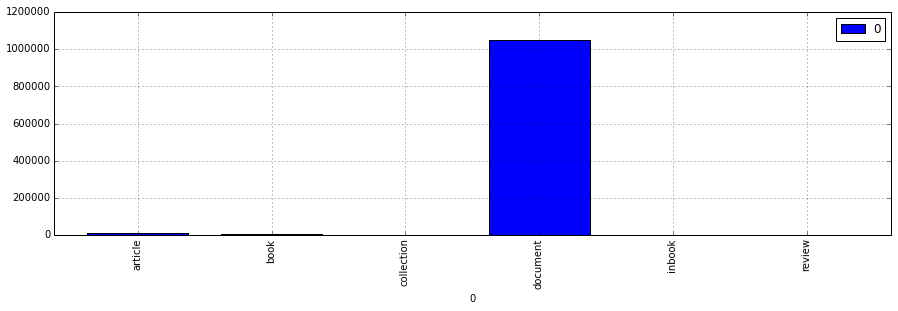

In [195]:
dftype.plot(kind="bar",figsize=(15,4));

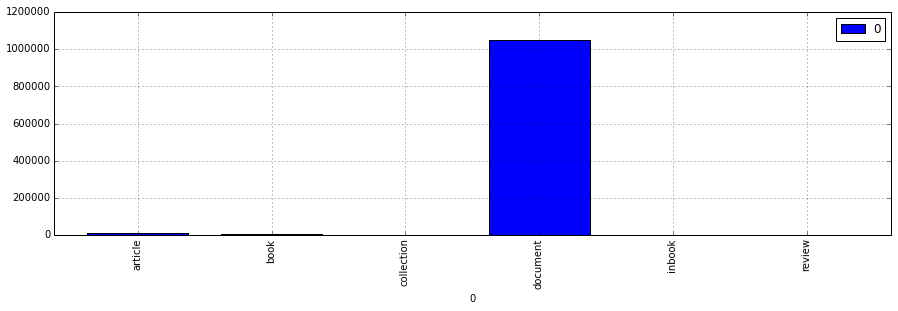

In [190]:
dftype.groupby(0).count().plot(kind="bar",figsize=(15,4));

In [6]:
set(a_s)

{'article', 'book', 'collection', 'document', 'inbook', 'review'}

In [7]:
brs[~brs["contributor"].isnull()]["contributor"][0]

[{'a': 'role',
  'iri': 'gar:01101',
  'label': 'agent role 01101 [ar/01101]',
  'role_of': {'a': 'agent',
   'fname': 'Merkel',
   'gname': ' Wolfgang',
   'iri': 'gra:01101',
   'label': 'responsible agent 01101 [ra/01101]'},
  'role_type': 'author'}]

In [8]:
len(brs)

1048697

In [9]:
len(brs[~brs["contributor"].isnull()]["contributor"]) # number of brs with authors informations - 145619

145619

In [10]:
145619/1048697

0.13885707692498406

In [11]:
a_iri=[]
for item in list(brs[~brs["contributor"].isnull()]["contributor"]):
    for item1 in item:
        a_iri.append(item1['iri'])

In [12]:
len(a_iri)

229247

In [13]:
len(list(set(a_iri))) # information about 229247 authors

229247

In [14]:
ls_date=[]
for item in brs[~brs["date"].isnull()]["date"]:
     ls_date.append(item["value"])

In [15]:
ddate=pd.DataFrame(ls_date)

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [58]:
ddate[0]=ddate[0].apply(int)

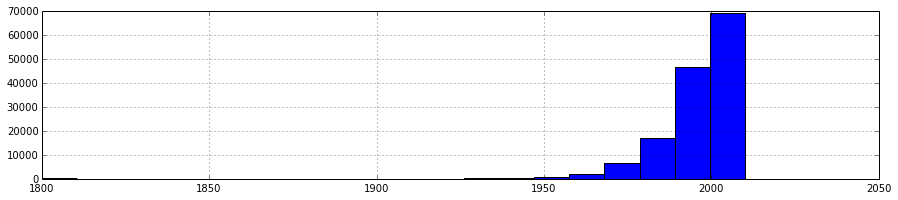

In [78]:
ddate[0].hist(figsize=(15,3),         # Plot size
              color="blue",          # Plot color
              bins=20,               # Use 50 bins
              range=(1800,2010)) 

In [60]:
#ddate[0].value_counts().plot(style='k--',figsize=(15,4), label='Series',kind="density");

In [61]:
#ddate[0].value_counts().plot(figsize=(15,4),kind="density");

In [36]:
ddate[0].max()

'2017'

In [77]:
ddate[0].min()

1803

In [82]:
datacount=pd.DataFrame(ddate[0].value_counts())

In [85]:
datacount["year"]=datacount.index

In [87]:
datacount.columns=["count","year"]

In [89]:
datacount.reset_index(inplace=True)

In [92]:
datacount[["year","count"]].head(5)

,year,count
0,2006,7281
1,2005,7183
2,2004,6763
3,2002,6638
4,2003,6546


In [211]:
datacount["year"].min()

1803

In [212]:
datacount["year"].max()

2017

In [97]:
datacount[["year","count"]][150:]

,year,count
150,1864,1
151,1814,1
152,1865,1
153,1870,1
154,1856,1


In [219]:
datacount=datacount[["year","count"]]

In [220]:
datacount.to_csv("Datedist.csv",index=True)

In [102]:
identifier=brs[~brs["identifier"].isnull()]["identifier"]

In [112]:
len(identifier)

131086

In [104]:
ls_id=[]
for item in identifier:
    for item1 in item:
        ls_id.append(item1)

In [108]:
ls_id=pd.DataFrame(ls_id)

In [111]:
set(ls_id["type"])

{'doi', 'isbn', 'issn', 'uri', 'url', 'urn'}

In [115]:
len(set(ls_id["iri"]))

195245

In [121]:
len(brs[~brs["reference"].isnull()]["reference"]) # 24221 ssoar papers with references 

24221

In [123]:
ls_ref=[]
for item in brs[~brs["reference"].isnull()]["reference"]:
    for item1 in item:
        ls_ref.append(item1)

In [126]:
ls_ref=pd.DataFrame(ls_ref)

In [129]:
len(ls_ref["iri"]) # number of whole references 1146424

1146424

In [130]:
len(set(ls_ref["iri"]))

1146424

In [133]:
len(ls_ref["crossref"])

1146424

In [138]:
len(set(ls_ref["crossref"]))

1026126

In [139]:
groupby_ls_ref=ls_ref.groupby(["crossref"]).agg(['count'])

In [141]:
groupby_ls_ref.columns

MultiIndex(levels=[['a', 'content', 'iri', 'label'], ['count']],
           labels=[[0, 1, 2, 3], [0, 0, 0, 0]])

In [149]:
groupby_ls_ref.columns

MultiIndex(levels=[['a', 'content', 'iri', 'label'], ['count']],
           labels=[[0, 1, 2, 3], [0, 0, 0, 0]])

In [158]:
groupby_ls_ref["iri"]["count"].max()

223

In [159]:
iri_ref_g=groupby_ls_ref["iri"]

In [160]:
iri_ref_g[iri_ref_g["count"]==223]

,count
crossref,
gbr:0110935,223


In [162]:
iri_ref_g[iri_ref_g["count"]!=223].max()

count    142
dtype: int64

In [164]:
iri_ref_g[iri_ref_g["count"]==142]

,count
crossref,
gbr:011024114,142
gbr:01103389,142


In [166]:
iri_ref_g[iri_ref_g["count"]!=223][iri_ref_g["count"]!=142].max()

/usr/lib/python3/dist-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


count    139
dtype: int64

In [167]:
iri_ref_g[iri_ref_g["count"]==139]

,count
crossref,
gbr:01101235,139


In [214]:
for item in brs[brs["iri"]=="gbr:0110935"]["identifier"]:
    print(item) # issn: 0970-0242

[{'id': '0970-0242', 'label': 'identifier 01101723 [id/01101723]', 'a': 'unique_identifier', 'iri': 'gid:01101723', 'type': 'issn'}]


In [216]:
for item in brs[brs["iri"]=="gbr:011024114"]["identifier"]:
    print(item) #issn: 0002-9602

[{'id': '0002-9602', 'label': 'identifier 01107609 [id/01107609]', 'a': 'unique_identifier', 'iri': 'gid:01107609', 'type': 'issn'}]


In [217]:
for item in brs[brs["iri"]=="gbr:01103389"]["identifier"]:
    print(item)

nan


In [218]:
for item in brs[brs["iri"]=="gbr:01101235"]["identifier"]:
    print(item) #issn: 0342-9857
    #urn:nbn:de:0168-ssoar-53147

[{'id': '0342-9857', 'label': 'identifier 01101824 [id/01101824]', 'a': 'unique_identifier', 'iri': 'gid:01101824', 'type': 'issn'}, {'id': 'urn:nbn:de:0168-ssoar-53147', 'label': 'identifier 01101825 [id/01101825]', 'a': 'unique_identifier', 'iri': 'gid:01101825', 'type': 'urn'}]


In [175]:
len(brs[~brs["title"].isnull()])

157196

In [181]:
157196/1048697

0.14989649059737942

In [176]:
len(brs[~brs["contributor"].isnull()])

145619

In [182]:
145619/1048697

0.13885707692498406

In [177]:
len(brs[~brs["date"].isnull()])

157132

In [183]:
157132/1048697

0.14983546248344373

In [178]:
len(brs[~brs["identifier"].isnull()])

131086

In [179]:
len(brs[~brs["identifier"].isnull()][~brs["title"].isnull()][~brs["contributor"].isnull()][~brs["date"].isnull()])

/usr/lib/python3/dist-packages/pandas/core/frame.py:1686: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


122841

In [184]:
122841/1048697

0.11713678974956541

In [180]:
len(brs)

1048697

In [225]:
iri_ref_g=iri_ref_g.sort("count",ascending=False)

In [227]:
iri_ref_g.to_csv("inner-citation.csv")